In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#ノッチの幅
xi=0.1

#ノッチの深さ
d=0.1

fn=1000

#サンプリング周波数
T=1/8000


#中心周波数
wn=2*np.pi*fn

#プリワーピング
wn=(2/T)*np.tan(wn*T/2)




In [4]:
N2=1-(T*wn/2)*d*2*xi+(T*wn/2)**2
N1=2*(T*wn/2)**2-2
N0=1+(T*wn/2)*d*2*xi+(T*wn/2)**2
D2=1-(T*wn/2)*2*xi+(T*wn/2)**2
D1=2*(T*wn/2)**2-2
D0=1+(T*wn/2)*2*xi+(T*wn/2)**2

print("N2:"+str(N2))
print("N1:"+str(N1))
print("N0:"+str(N0))
print("D2:"+str(D2))
print("D1:"+str(D1))
print("D0:"+str(D0))


N2:1.163288604006348
N1:-1.6568542494923801
N0:1.179857146501272
D2:1.0887301627791908
D1:-1.6568542494923801
D0:1.2544155877284289


In [5]:
def analize(Omega):

  Omega=Omega*1000*2*np.pi
  z=np.exp(1j*Omega*T)
  Gz=(N2*z**(-2)+N1*z**(-1)+N0)/(D2*z**(-2)+D1*z**(-1)+D0)
  y=abs(Gz)

  return y

In [7]:
x=np.arange(0.1,4.02,0.02)
y=np.vectorize(analize)(x)
print(x)
print(y*0.5)

[0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36
 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64
 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92
 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1  1.12 1.14 1.16 1.18 1.2
 1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38 1.4  1.42 1.44 1.46 1.48
 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66 1.68 1.7  1.72 1.74 1.76
 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94 1.96 1.98 2.   2.02 2.04
 2.06 2.08 2.1  2.12 2.14 2.16 2.18 2.2  2.22 2.24 2.26 2.28 2.3  2.32
 2.34 2.36 2.38 2.4  2.42 2.44 2.46 2.48 2.5  2.52 2.54 2.56 2.58 2.6
 2.62 2.64 2.66 2.68 2.7  2.72 2.74 2.76 2.78 2.8  2.82 2.84 2.86 2.88
 2.9  2.92 2.94 2.96 2.98 3.   3.02 3.04 3.06 3.08 3.1  3.12 3.14 3.16
 3.18 3.2  3.22 3.24 3.26 3.28 3.3  3.32 3.34 3.36 3.38 3.4  3.42 3.44
 3.46 3.48 3.5  3.52 3.54 3.56 3.58 3.6  3.62 3.64 3.66 3.68 3.7  3.72
 3.74 3.76 3.78 3.8  3.82 3.84 3.86 3.88 3.9  3.92 3.94 3.96 3.98 4.  ]
[0.4999

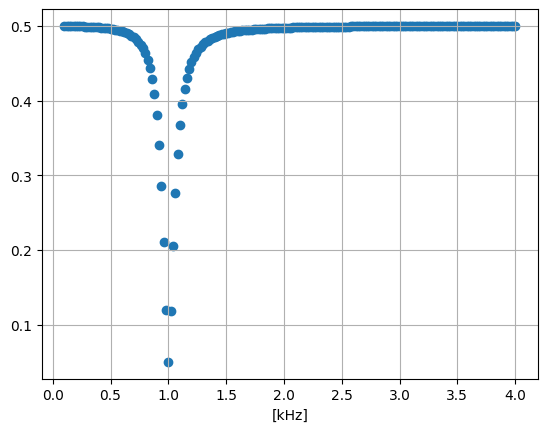

In [8]:
plt.scatter(x,y*0.5)
plt.grid()
plt.xlabel("[kHz]")
plt.show()

In [72]:
df=pd.DataFrame(y*0.5)

In [63]:
df.to_csv("notch.csv",header=None,index=None)